In [1]:
# Modules and Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import datasets


In [21]:
data = datasets.load_digits()


In [20]:
image_data = data.images

reshaped = image_data.reshape(1797,64)
df = pd.DataFrame(reshaped)

target = data.target

target_values = data.target_names

In [14]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


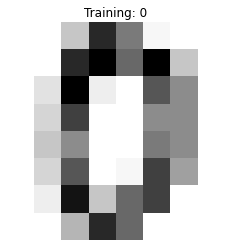

In [22]:
img = df.loc[0].values.reshape((8,8))
plt.imshow(img, cmap="Greys")
plt.title('Training: ' + str(target[0]))
plt.axis('off')
plt.show()

In [28]:
# split the data into training and test

df['Target'] = target.tolist()

training = df.sample(frac = 0.5)

test = df.drop(training.index)

training.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Target
1789,0.0,0.0,8.0,16.0,3.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,16.0,10.0,1.0,0.0,0.0,8
1098,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,14.0,2.0,0.0,0.0,5
342,0.0,0.0,3.0,13.0,16.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,13.0,0.0,0.0,0.0,0.0,7
1711,0.0,0.0,1.0,11.0,16.0,16.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,16.0,5.0,0.0,0.0,0.0,7
148,0.0,0.0,3.0,13.0,13.0,3.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,3.0,13.0,16.0,10.0,1.0,0.0,8


In [47]:
# Support Vector Machine model

x = training.iloc[:,:63]
y = training.iloc[:,64]

svm = SVC(gamma = 0.0001 , random_state=42)

# using digits in the training set

svm.fit(x,y)

SVC(gamma=0.0001, random_state=42)

In [48]:
x_test = test.iloc[:,:63]

pred = svm.predict(x_test)

In [52]:
accuracy = accuracy_score(test.iloc[:,64],pred)
print(accuracy)

0.9666295884315906


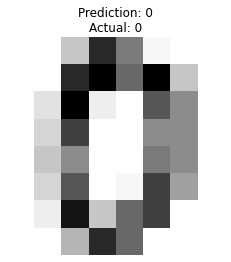

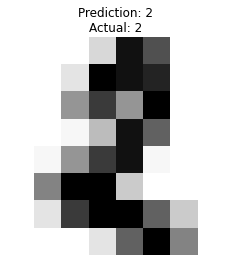

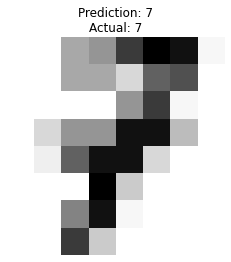

In [76]:
for i in range(0,3):
    img = test.iloc[i,:64].values.reshape((8,8))
    plt.imshow(img, cmap="Greys")
    plt.title('Prediction: ' + str(pred[i])  + '\n' + 'Actual: ' + str(test.iloc[i,64]))
    plt.axis('off')
    plt.show()